---
title: Mixture Models
layout: collection
permalink: /Machine-Learning/Mixture-Models
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import cm

sns.set_theme()

In mixture models we assume that the input examples come from different potentially unobserved types (groups, clusters etc.).
We assume that there are $m$ underlying types where each type $z$ occurs with a certain probability $ \mathbb{P}(z) $.
The examples of the type $z$ are then conditionally distributed $ \mathbb{P}(\mathbf{x}|z )  $. 
The observations $ \mathbf{x}   $ then come from a so called mixture distribution, which is just the weighted sum of the type probability times the conditional type probability

$$
\mathbb{P}(\mathbf{x} ) = \sum_{j=1}^m  \mathbb{P}(z=j) \mathbb{P}(\mathbf{x} | z=j, \mathbf{\theta}_j )   
$$

A mixture of gaussians model has the form

$$
\mathbb{P}(\mathbf{x} | \mathbf{\theta}  ) = \sum_{j=1}^m \pi_j \mathcal{N}(\mathbf{x} | \mathbf{\mu}_j, \Sigma_j  )    
$$

where $ \mathbf{\theta} = \pi_1, ..., \pi_m | \mathbf{\mu}_1, ..., \mathbf{\mu}_m | \Sigma_1, ..., \Sigma_m   $. $\pi_j$is the so called mixing proportion which can be seen as the probability of an observations coming from a class $j$. Thus the probability of a class itself.

# Data generation

During the data generation, with probability $ \mathbb{P}(z)  $ class $z_j$ is chosen and the sample points $ \mathbf{x} $ are chosen from the conditional distribution $ \mathbb{P}(\mathbf{x} | z = j )  $.
For a two class system, our sample points $ \mathbf{x}  $ could then have been generated in two ways. We thus would like to find out the underlying distribution of our observations.

# Latent Variable Models (LVM).

In the model $ \mathbb{P}(\mathbf{x} | z=j, \mathbf{\theta})$ the class indicator variable $z$ is latent. This means that $z$ is a variable that can only be indirectly inferred through mathematical models from other observable variables that can directly be observed. 
They are not directly measurable / observed.
This then is an example of a large class of latent variable models (LVM).
We use the Bayesian network (DAG) as a graphical representation of the join distribution of RVs as $\mathbb{P}(x_1, ..., x_n) = \prod_{i=1}^n \mathbb{P}(x_i | parents(x_i))$, i.e.

$$
\mathbb{P}(x_i | \mathbf{\theta}) = \sum_{z_i} \mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta}) = \sum_{z_i} \mathbb{P}(\mathbf{x}_i | \mathbf{\mu}, \Sigma, z_i) \mathbb{P}(z_i | \mathbf{\pi})
$$

In this graph our RVs are $ \mathbf{x}_i$ and $z_i$ which hold the parameters $ \mathbf{\mu}, \Sigma $ and  $\mathbf{\pi}$.

![LV-MixtureModel](LV-MixtureModel.png)

If we now assume we have a two component mixture model then we can write our probability of $ \mathbf{x}$ given the parameters  $ \mathbf{\theta} $ as followed

$$
\mathbb{P}(\mathbf{x} | \mathbf{\theta}) = \pi_1 \mathbb{P}(\mathbf{x} | \mathbf{\mu}_1, \Sigma_1) + \pi_2 \mathbb{P}(\mathbf{x} | \mathbf{\mu}_2, \Sigma_2)
$$

# Mixture density estimation

If we knew our generating component $z_i$, the estimation of the points $ \mathbf{x} $ would be easy.
Let $\delta(j|i)$ be an indicator function of whether an example $i$ is labeled $j$. 
Then for our class distribution we can estimate the parameters by

$$
\begin{align*}
    &\hat{\pi}_j &\leftarrow &\frac{\sum_{i=1}^n \delta(j|i)}{n} = \frac{\hat{n}_j}{n} \\
    &\hat{\mathbf{\mu}}_j &\leftarrow  &\frac{1}{\hat{n}_j} \sum_{i=1}^n \delta(j|i) \mathbf{x}_i \\
    &\hat{\Sigma}_j &\leftarrow &\frac{1}{\hat{n}_j} \sum_{i=1}^n \delta(j|i)(\mathbf{x}_i - \mathbf{\mu}_j)(\mathbf{x}_i - \mathbf{\mu}_j)^T
\end{align*}
$$

Even though we don't know our labels, we can estimate them based on our calculated distributions.

$$
\mathbb{P}(z=1 | \mathbf{x}, \mathbf{\theta}) 
= 
\frac{\mathbb{P}(z=1) \mathbb{P}(\mathbf{x}|z=1)}{\sum_{j=1, 2} \mathbb{P}(z=j)\mathbb{P}(\mathbf{x} | z=j)} 
= 
\frac{\pi_1 \mathbb{P}(\mathbf{x}|\mathbf{\mu}_1, \Sigma_1)}{\sum_{j=1, 2} \pi_j \mathbb{P}(\mathbf{x} | \mathbf{\mu}_j, \Sigma_j)}
$$

Our soft labels i.e. the prob of a given latent variable is then just the posterior. Thus by calculating the posterior we get the mixture probability.
We write our soft labels as $ \hat{p}(j|i) $, thus the probability of point $i$ being of class $j$.
$z_i$ here is then the class of $ \mathbf{x}_i $.

# EM-Algorithm

* E-Step: Softly assign examples to mixture models

$$
\hat{p}(j|i) \leftarrow \mathbb{P}(z_i = j | \mathbf{x}_i, \mathbf{\theta}^t)
$$

* M-Step: Estimate new mixture parameters $ \mathbf{\theta}^{t+1}$ based on soft assignements

$$
\begin{align*}
    &\hat{\pi}_j &\leftarrow &\frac{\sum_{i=1}^n \delta(j|i)}{n} = \frac{\hat{n}_j}{n} \\
    &\hat{\mathbf{\mu}}_j &\leftarrow  &\frac{1}{\hat{n}_j} \sum_{i=1}^n \delta(j|i) \mathbf{x}_i \\
    &\hat{\Sigma}_j &\leftarrow &\frac{1}{\hat{n}_j} \sum_{i=1}^n \delta(j|i)(\mathbf{x}_i - \mathbf{\mu}_j)(\mathbf{x}_i - \mathbf{\mu}_j)^T
\end{align*}
$$


# Bayesian model selection

Because we do not know the amount of mixture components there are in our data, we have to perform a model seletion. 
A simple way to approximate the amount of mixture components is to find $m$ that minimizes the overall description length of the model, i.e. the BIC for example.

$$
DL \approx -\log \mathbb{P}(data | \hat{\mathbf{\theta}}_m) + \frac{d_m}{n} \log(n)
$$

where $n$ is the number of training points, $\hat{\mathbf{\theta}}_m$ are the maximum likelihood parameters of the $m$-mixture component model and $d_m$ is the number of parameters in the $m$-mixture component model.

# Convergence of the EM-Algorithm

Because the EM-algorithm monotonically increases the log-likelihood of the training data, the EM-algorithm is guaranteed to converge atleast to a local optima

$$
I(\mathbf{\theta}^0) < I(\mathbf{\theta}^1) < I(\mathbf{\theta}^2) < ....
$$

with

$$
I(\mathbf{\theta}^t) = \sum_{i=1}^n \log(\mathbb{P}(\mathbf{x}_i | \mathbf{\theta}^t))
$$

For repetition the EM-Algorithm looks like

* Step 0: Initialise parameter setting $ \mathbf{\theta} = \mathbf{\theta}^0$

* E-Step: Softly assign examples to mixture models

$$
\hat{p}(j|i) \leftarrow \mathbb{P}(z_i = j | \mathbf{x}_i, \mathbf{\theta}^t)
$$

* M-Step: find the new setting of the parameter $ \mathbf{\theta}^{t+1} $ by maximizing the log-likelihood of the inferred (or expected complete) data 

$$
\mathbf{\theta}^{t+1} = \arg \max_{\theta} \sum_{i=1}^n \sum_{j=1}^m \mathbb{P}(z=j | \mathbf{x}_i, \mathbf{\theta}^t) \log[\pi_j \mathbb{P}(\mathbf{x}_i | \mathbf{\theta}_j)]
$$

The expected complete log-likelihood $Q(\mathbf{\theta}, \mathbf{\theta}^t)$ is called the auxiliary objective. The auxiliary function gives us new parameters which maximizes the expected log likelihood. This is the expectation of the log-likelihood with respect to the probability of the class assignements given the current model and input $ \mathbf{x} $.

# Jensen's inequality

For a convex function there exist always a secant line above the graph between two points

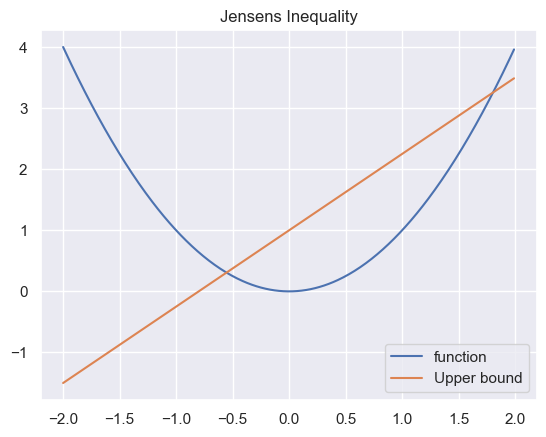

In [3]:
x = np.arange(-2, 2, 0.01)
y = x**2

line = 1.25 * x + 1

plt.title('Jensens Inequality')
plt.plot(x, y, label='function')
plt.plot(x, line, label='Upper bound')
plt.legend()
plt.show()

Thus for $a\in[0, 1]$ we get our line $af(x_1) + (1 - a)f(x_2)$ which gives us then the jensen's inequality

$$
f(ax_1 + (1 - a)x_2) \leq af(x_1) + (1 - a)f(x_2)
$$

For then X which is a RV and $\phi$ a convex function, we get

$$
\phi \left( \mathbb{E}[X] \right) \leq \mathbb{E}[\phi(X)]
$$

now if then $\phi$ is convex, $\psi = - \phi$ is a concave function and we get

$$
\psi \left( \mathbb{E}[X] \right) \geq \mathbb{E}[\psi(X)]
$$

for example the logarithm, which is a concave function which yields $\log (\mathbb{E}[X]) \geq \mathbb{E}[\log(X)]$.

# Gibbs inequality

Given the definition of the  KL-divergence ($\mathbb{KL}(p(x)||q(x))$), which is a distance measure of two distributions this gives together with the jensen's inequality the so called Gibbs' inequality.

$$
\begin{align*}
    -\mathbb{KL}(p(x)||q(x)) 
    &=
    \int p(x) \log \left( \frac{q(x)}{p(x)} \right) dx \\
    &\leq 
    \log \left( \int p(x) \frac{q(x)}{p(x)}\right) dx \\
    &=
    \log \left( \int q(x) dx \right)  \\
    &=
    0
\end{align*}
$$

Note that the KL-divergence is a non-negative value and iff $q=p \Rightarrow \mathbb{KL} = 0$, else $\mathbb{KL} \neq 0$.

# Convergence proof

Looking at the log-likelihood of our EM, we assume the latent variables are distributed according to $ q(z_i) $. 
We don't make any assumptions regarding $ q(z_i) $, other than that it is a valid probability distribution.
$$
\begin{align*}
    I(\mathbf{\theta}) 
    &=
    \sum_{i=1}^n \log \mathbb{P}(\mathbf{x}_i | \mathbf{\theta}) \\
    &=
    \sum_{i=1}^n \log \sum_{z_i} \mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta}) \\
    &=
    \sum_{i=1}^n \log \sum_{z_i} q(z_i) \frac{\mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta})}{q(z_i)} \\
    &=
    \sum_{i=1}^n \log \mathbb{E}_{q_i} \frac{\mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta})}{q(z_i)} \\
    &\geq 
    \sum_{i=1}^n \sum_{z_i} q(z_i) \log \frac{\mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta})}{q(z_i)} \\
    & =: Q(\theta, q)
\end{align*}
$$

Thus we get a lower bound on our likelihood which is valid for any given postive distribution q. 
We then would like to pick $q$ which gives the tighest lower bound, i.e. the one that maximizes the auxilirary function. This is the E-step of the EM algorithm.
At time $t$, we assume we have chosen $q^t$ based on current parameters $ \mathbf{\theta}^t $.
In the M-Step wou  would then like to maximize the expected complete log-likelihood

$$
\mathbf{\theta}^{t+1} = \arg \max_{\mathbf{\theta}} Q(\mathbf{\theta}, \mathbf{\theta}^t) = \arg \max_{\mathbf{\theta}} \sum_{i=1}^n \mathbb{E}_{q_i^t} \log  \mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta})
$$

This new $ \mathbf{\theta}$ maximizes our lower bound at step $t$. Thus the $ \mathbf{\theta} $ which we want to maximize in the M-Step also maximizes our lower bound, because our choise of $q^t$ depends on $ \mathbf{\theta}^t $.

The second expression is what we want to do in the M-Step, i.e. we would like to maximize our Expected complete log likelihood which signifies the likelihood (probability) of our assignements of the points being of the correct class.
The equility follows from 

$$
Q(\mathbf{\theta}, q) = \sum_{i=1}^n \mathbb{E}_{q_i} \log \mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta}) + \sum_{i=1}^n ( - \sum_{z_i} q(z_i) \log q(z_i))
$$

Because the second term is independent of $ \mathbf{\theta}^t $, if we want to maximize the expected complete log likelihood, we maximize our lower bound.

For now the lower bound we rewrite this as 

$$
Q(\mathbf{\theta}, q) = \sum_{i} L(\mathbf{\theta}, q_i)
$$

with 

$$
\begin{align*}
    L(\mathbf{\theta}, q_i) 
    &= 
    \sum_{z_i} q(z_i) \log \frac{\mathbb{P}(\mathbf{x}_i, z_i | \mathbf{\theta})}{q(z_i)} \\
    &=
    \sum_{z_i} q(z_i) \log \frac{\mathbb{P}(z_i |\mathbf{x}_i, \mathbf{\theta}) \mathbb{P}(\mathbf{x}_i | \mathbf{\theta})}{q(z_i) } \\
    &=
    \sum_{z_i} q(z_i) \log \frac{\mathbb{P}(z_i |\mathbf{x}_i, \mathbf{\theta})}{q(z_i) } + \sum_{z_i} q(z_i) \log \mathbb{P}(\mathbf{x}_i | \mathbf{\theta}) \\
    &=
    - \mathbb{KL}(q(z_i) || \mathbb{P}(z_i | \mathbf{x}_i, \mathbf{\theta})) + \log  \mathbb{P}(\mathbf{x}_i | \mathbf{\theta})
\end{align*}
$$

Thus if we want to maximize the likelihood \mathbb{L}(\mathbf{\theta}, q_i) we choose $q^t_i(z_i)$ which maximizes the KL-divergence, which is then exactly the distribution $ \mathbb{P}(z_i | \mathbf{x}_i, \mathbf{\theta}^t) $

$$
\begin{align*}
    q_i^t(z_i) = \mathbb{P}(z_i | \mathbf{x}_i, \mathbf{\theta}^t) &= \arg \max_{q_i} L(\mathbf{\theta}^t, q_i) \\
    \Rightarrow L(\mathbf{\theta}^t, q_i^t) &= \log \mathbb{P}(\mathbf{x}_i | \mathbf{\theta}^t) \\
    \Rightarrow Q(\mathbf{\theta}^t, \mathbf{\theta}^t) = \sum_{i} \log \mathbb{P}(\mathbf{x}_i | \mathbf{\theta}^t) = I(\mathbf{\theta}^t)
\end{align*}
$$

Thus the lower bound always touches a specific point of the log-likelihood. 
We then maximize our auxilirary function and move in that direction, still touching the true log-likelihood. 
This causes us to monotonically increase our log-likelihood which converges then to a local optima of the true log-likelihood.
The monotonic increase thus comes from

$$
I(\mathbf{\theta}^{t+1}) \geq Q(\mathbf{\theta}^{t+1}, \mathbf{\theta}) = \max_{\mathbf{\theta}} Q(\mathbf{\theta}, \mathbf{\theta}^{t}) \geq Q(\mathbf{\theta}^t, \mathbf{\theta}^t) = I(\mathbf{\theta}^t)
$$


![EM](Parameter-update-in-the-EM-algorithm.jpg)

We can thus summarize the EM-algorithm as

1. E-Step: $\mathbf{q}^t = \arg \max_{\mathbf{q}} Q(\mathbf{\theta}^t, \mathbf{q})$
2. M-Step: $ \mathbf{\theta}^{t+1} = \arg \max_{\mathbf{\theta}} Q(\mathbf{\theta}, \mathbf{\theta}^t)$


In the E-Step we estimate the expected value for each latent variable, i.e. the soft labels and in the M-Step we optimize the parameters with these new soft labels.

In [201]:
def EM(X: np.array, K: int) -> tuple[np.array, np.array]:
    means = np.array([[-1, -1], [1, 1]])
    covs = np.array([[[1, 0.8], [0.8, 1]], [[1, -0.4], [-0.4, 1]]])
    
    pz = np.zeros(K) + (1 / K)
    
    iteration = 0
    converged = False
    while not converged:
        for k in range(K):
            
            # E-Step
            nominator = pz[k] * stats.multivariate_normal(mean=means[k], cov=covs[k]).pdf(X) + 1e-4
            denominator = np.sum([pz[i] * stats.multivariate_normal(mean=means[i], cov=covs[i]).pdf(X) + 1e-4 for i in range(K)])
            r = nominator / denominator
            pz[k] = np.mean(r)
            # M-Step
            means[k] = np.sum([r[i] * X[i] for i in range(len(X))]) / np.sum(r)
            
            cov = np.zeros((2, 2))
            
            for i in range(len(X)):
                cov += r[i] * np.outer(X[i] - means[k], X[i] - means[k])
            covs[k] = cov /  np.sum(r)  
            
            #means[k] = r.T @ X / np.sum(r) + 1e-4
            
            #covs[k] = ((X * r[:, None])  - means[k]).T @ (X - means[k]) / np.sum(r)  + 1e-4 
            
            
            log_likelihood = ...
            
        iteration += 1
        
        if iteration > 100:
            print('stop')
            break
    return means, covs

stop
[[0 0]
 [1 1]] [[[ 8.40027867  6.95616178]
  [ 6.95616178 10.5413611 ]]

 [[ 8.52422479  7.14547898]
  [ 7.14547898 10.74023968]]]


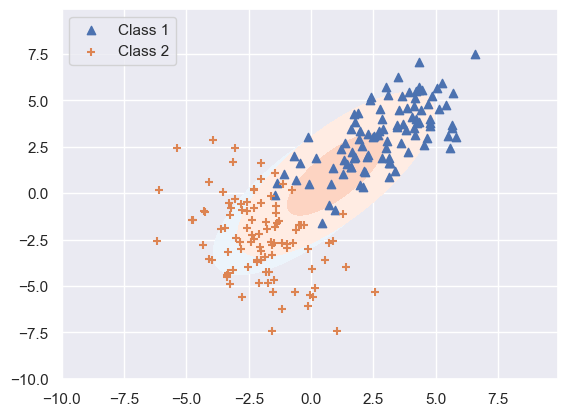

In [213]:
np.random.seed(0)
x = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, x)
pos = np.dstack((X, Y))

norm1 = stats.multivariate_normal([3, 3], [[3, 2], [2, 3]])
norm2 = stats.multivariate_normal([-2, -2], [[2, 1], [-2, 5]])

class1 = norm1.rvs(size=100)
class2 = norm2.rvs(size=100)

data = np.vstack((class1, class2))
mean , cov = EM(data, 2)
print(mean, cov)
x = np.arange(-10, 10, 0.1)

norm1_pred = stats.multivariate_normal(mean[0], cov[0])
norm2_pred = stats.multivariate_normal(mean[1], cov[1])

Z1 = norm1_pred.pdf(pos)
Z2 = norm2_pred.pdf(pos)

levels = np.arange(0.0, 0.1, 0.01) + 0.01

plt.contourf(X, Y, Z1, levels, extent=(-3,3,-2,2),cmap=cm.Blues, alpha=1)
plt.contourf(X, Y, Z2, levels, extent=(-3,3,-2,2),cmap=cm.Reds, alpha=1)
plt.scatter(class1[:, 0], class1[:, 1], marker='^', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], marker='+', label='Class 2')
plt.legend()
plt.show()

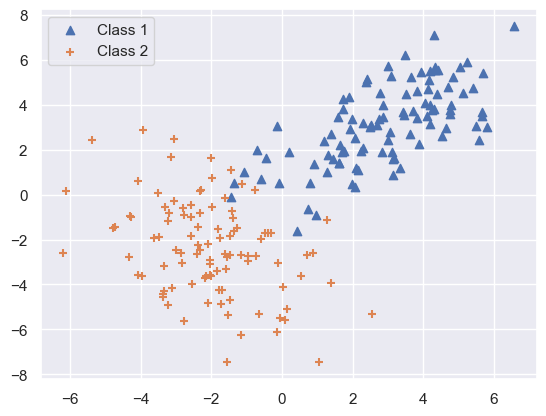

In [207]:
np.random.seed(0)
x = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, x)
pos = np.dstack((X, Y))


norm1 = stats.multivariate_normal([3, 3], [[3, 2], [2, 3]])
norm2 = stats.multivariate_normal([-2, -2], [[2, 1], [-2, 5]])

class1 = norm1.rvs(size=100)
class2 = norm2.rvs(size=100)

Z1 = norm1.pdf(pos)
Z2 = norm2.pdf(pos)

levels = np.arange(0.0, 0.1, 0.01) + 0.01

#plt.contourf(X, Y, Z1, levels, extent=(-3,3,-2,2),cmap=cm.Blues, alpha=1)
#plt.contourf(X, Y, Z2, levels, extent=(-3,3,-2,2),cmap=cm.Reds, alpha=1)
plt.scatter(class1[:, 0], class1[:, 1], marker='^', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], marker='+', label='Class 2')
plt.legend()
plt.show()

# Conditional Mixtures

Sometimes a regression or classification problem can be decomposed into easier subproblems, where each sub problem is solved by a specific expert.
The selection of which expert to rely on now depends on the position of $ \mathbf{x} $ in the input space
This is the so called mixtures of experts models.

Suppose we have several regression experts generating conditional Gaussian outputs

$$
\mathbb{P}(y | \mathbf{x}, z=j, \mathbf{\theta}) = \mathcal{N}(y | \beta^T_j \mathbf{x}, \sigma_j^2)
$$

where $ \mathbf{\delta}_j = \{ \beta_j, \sigma^2_j \} $ are the parameters of the j-ith expert.
The paremeter vector $ \mathbf{\theta} $ contains the means and variances of the $m$ experts and the additional parameters $ \mathbf{\eta} $ of this allocation mechanism $ \mathbf{\theta} = \{ \mathbf{\delta}_j, \mathbf{\eta}_j \}^m_{j=1} $.

![expert-DAG](expert-DAG.png)

From the DAG we conclude that

$$
\begin{align*}
    \mathbb{\mathbb{P}(y, z=j | \mathbf{x})} 
    &=
    \mathbb{P}(y | \mathbf{\delta}, z=j, \mathbf{x}) \mathbb{P}(z=j | \mathbf{\eta}, \mathbf{x}) \\
    &=
    \mathbb{P}(y | \mathbf{\delta}_j, \mathbf{x}) \mathbb{P}(z=j | \mathbf{\eta}, \mathbf{x}) \\
    &=
    \mathcal{N}(y | \beta_j^t \mathbf{x}, \sigma^2_j) \mathbb{P}(z=j | \mathbf{\eta}, \mathbf{x})
\end{align*}
$$

Thus the overall prediction is 

$$
\begin{align*}
    \mathbb{P}(y| \mathbf{x}, \mathbb{\theta})
    &=
    \sum_j \mathbb{P}(y, z=j | \mathbf{x}, \mathbf{\eta}, \mathbf{\delta}) \\
    &=
    \sum_j \mathbb{P}(z=j | \mathbf{x}, \mathbf{\eta}) \mathbb{P}(y | \mathbf{x}, \mathbf{\delta}_j) \\
    &=
    \sum_j \mathbb{P}(z=j | \mathbf{x}, \mathbf{\eta}) \mathbb{P}(y | \mathbf{x}, \beta_j, \sigma^2_j) \\
\end{align*}
$$

# Gating network

If now we have multiple experts how would we switch from one model to another? 
We can use a probalistic switch, i.e. a probalistic gating function $ \mathbb{P}(z|\mathbf{x}m, \mathbf{\eta}) $ which tells us the probability of a input beloning to a expert.
For example for a two expers system, our gating network can be a logistic regression model

$$
\mathbb{P}(z=1 | \mathbf{x}, \mathbf{\eta}) = \sigma(\mathbf{\eta}^t \mathbf{x})
$$

For more experts we can just expand this to the usage of the softmax model

$$
\mathbb{P}(z=j | \mathbf{x}, \mathbf{\eta}) = \frac{\exp(\mathbf{\eta}_j^t \mathbf{x})}{\sum_{j'=1}^m \exp(\mathbf{\eta}_
{j'}^t \mathbf{x}) }
$$

The so called soft label, i.e. the conditional probability that the pair $(\mathbf{x}_i, y_i)$ came from expert $j$ is given by

$$
\begin{align*}
    \hat{\mathbb{P}}(j|i) 
    &= 
    \mathbb{P}(z=j | \mathbf{x}_i, \mathbf{y}_i, \mathbf{\theta}) \\
    &=
    \frac{\mathbb{P}(z=j | \mathbf{x}_i, \mathbf{\eta}^t) \mathbb{P}(y_i | \mathbf{x}_i, (\beta_j, \sigma^2_j)) }{\sum_{j' = 1}^m\mathbb{P}(z=j' | \mathbf{x}_i, \mathbf{\eta}^t) \mathbb{P}(y_i | \mathbf{x}_i, (\beta_{j'}, \sigma^2_{j'}))}
\end{align*}
$$

The EM-Algorithm is then given by

1. E-Step: Compute soft labels $\hat{\mathbb{P}}(j|i)$
2. M-Step: Separately re-estimate the experts and the gating network based on these soft assignements
    
For each expert $j$: find $(\hat{\beta}_j, \hat{\sigma}^2_j)$ that maximize (linear regression with weighted training set)

$$
\sum_{i=1}^n \hat{\mathbb{P}}(j|i) \log \mathbb{P}(y_i | \mathbf{x}_i, (\beta_j, \sigma^2_j))
$$  

For the gating network: find $ \hat{\mathbf{\eta}} $ that maximize (logistic regression with weighted training set)
    
$$
\sum_{i=1}^n \sum_{j=1}^m \hat{\mathbb{P}}(j|i) \log \mathbb{P}(j | \mathbf{x}_i, \mathbf{\eta}_j)
$$  